In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

In [2]:
with open('data/day8_input.txt') as f:
    lines = f.readlines()

In [3]:
# lines = ['30373\n',
#         '25512\n',
#         '65332\n',
#         '33549\n',
#         '35390\n']

In [4]:
lines = [[*line] for line in lines]

In [5]:
def data_list_to_df(data):
    data_list = []
    x = 0
    y = 0
    while x < len(lines):
        for line in lines[x]:
            for num in line:
                if num == '\n':
                    continue
                data_list.append({'val':int(num), 'xcoord':x, 'ycoord':y})
                y += 1    
        x += 1
        y=0
    return pd.DataFrame(data_list)

In [6]:
df = data_list_to_df(lines)

In [7]:
geometry = [Point(xy) for xy in zip(df.xcoord, df.ycoord)]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

<AxesSubplot:>

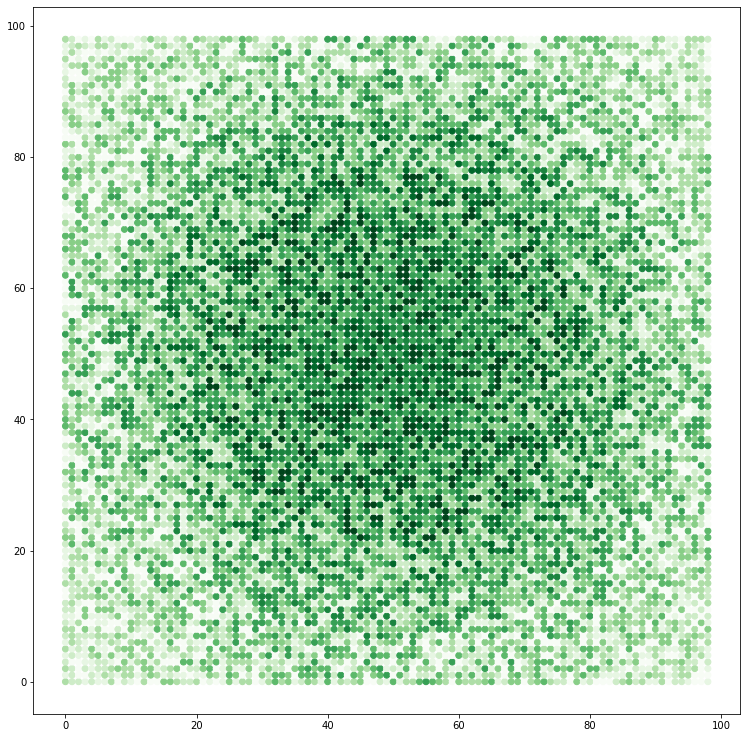

In [8]:
gdf.plot('val', 
         cmap='Greens',
         figsize=(13,13))

In [9]:
gdf['visible'] = False

In [10]:
def calc_visible(gdf, col, direction):
    past_trees = [-1]
    considering_row = 0
    highest_value = -1
    for i, tree in gdf.iterrows():
        view_score = 0
        
        if tree[col] != considering_row:
            considering_row = tree[col]
            highest_value = -1
            past_trees = [-1]
            
        # part 2
        for pt in past_trees[::-1]:
            
            if pt == -1: 
                gdf.loc[i, f'view_score_{direction}'] = view_score 
                break
            elif pt >= tree['val']:
                view_score +=1
                gdf.loc[i, f'view_score_{direction}'] = view_score 
                break
            else:
                view_score +=1
           
        past_trees.append(tree['val'])
        
        # part 1    
        if tree['val'] > highest_value:
            gdf.loc[i, 'visible'] = True
            highest_value = tree['val']

    return gdf

In [11]:
gdf = calc_visible(gdf, 'xcoord', 'x_asc')

In [12]:
gdf = gdf.sort_values(by=['xcoord',
                          'ycoord'], ascending=[False, 
                                                False]).reset_index()
gdf.drop('index', axis=1, inplace=True)
gdf = calc_visible(gdf, 'xcoord', 'x_desc')

In [13]:
gdf = gdf.sort_values(by=['ycoord',
                          'xcoord']).reset_index()
gdf.drop('index', axis=1, inplace=True)
gdf = calc_visible(gdf, 'ycoord', 'y_asc')

In [14]:
gdf = gdf.sort_values(by=['ycoord',
                          'xcoord'], ascending=[False, 
                                                False]).reset_index()
gdf.drop('index', axis=1, inplace=True)
gdf = calc_visible(gdf, 'ycoord', 'y_desc')

In [15]:
print('Part 1 Solution:')
print(f'The number of visible trees is {gdf.visible.value_counts()[True]}.')

Part 1 Solution:
The number of visible trees is 1715.


<AxesSubplot:>

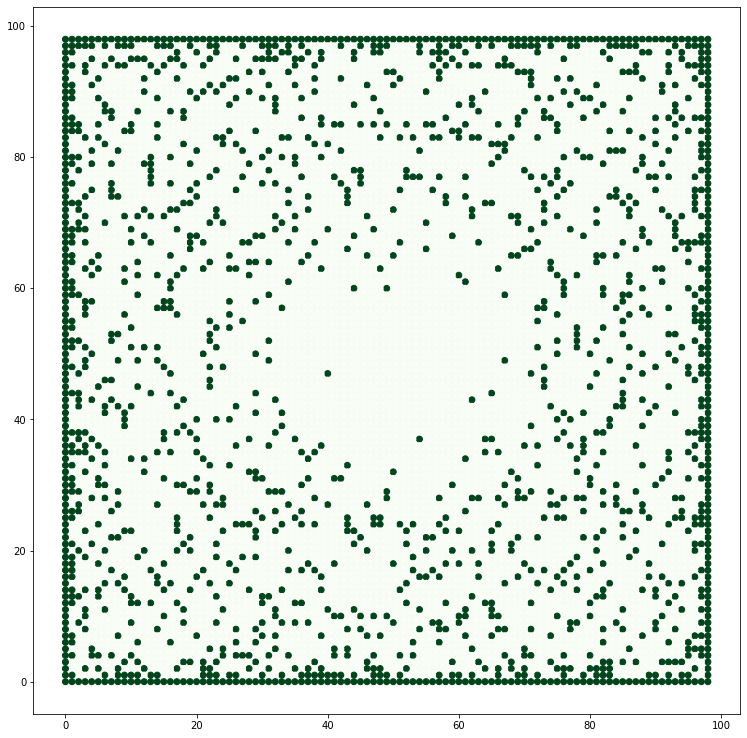

In [16]:
gdf.plot('visible', 
         cmap='Greens', 
         figsize=(13,13))

In [17]:
score_cols =[col for col in gdf if col.startswith('view_score')]
gdf[score_cols] = gdf[score_cols].replace(0,1)
gdf['total_view_score'] = gdf.loc[:, score_cols].prod(axis=1)

In [18]:
print('Part 2 Solution:')
print(f"The maximum visibility score is {int(max(gdf['total_view_score']))}.")

Part 2 Solution:
The maximum visibility score is 374400.


<AxesSubplot:>

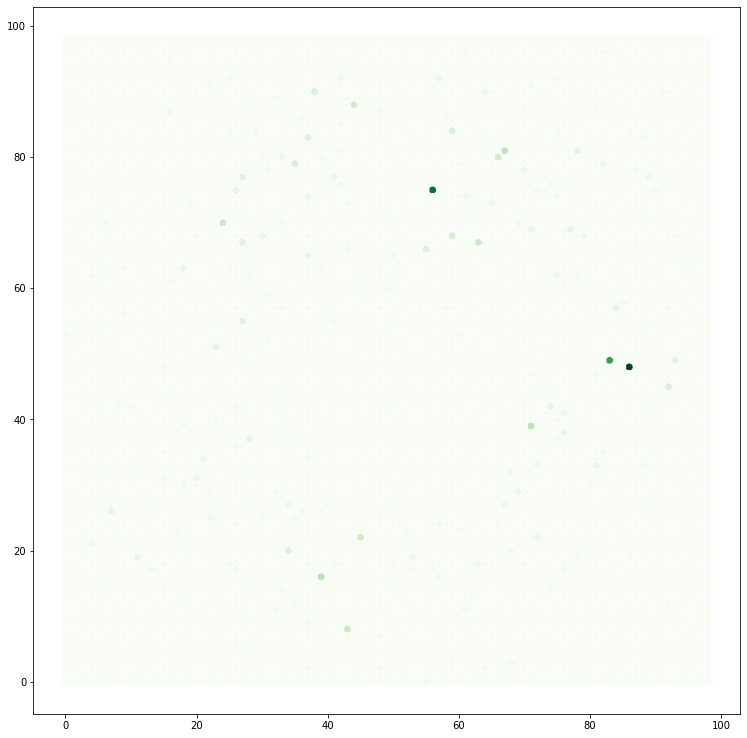

In [19]:
gdf.plot('total_view_score',
         cmap = 'Greens',
         figsize=(13,13))